# Pre-processing & Classification Try-Outs

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=1.5, gamma=0.2` | Cleaned+Extended+MinMaxScaled | `0.98541666666666672`
2 |1 |SVM/C | `kernel='rbf', C=8.7, gamma=0.04` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
3 |1 |kNN | `n_neigbors=3` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`

Default options:

- Scikit Learn train/test split ratio: `.25`.
- Normalizing all columns but `num_holes`.

## outdated

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_clean_manual.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
columns_ext = columns[:] # copy
COUNT = 8
for x in range(COUNT):
    for y in range(COUNT):
        name = '_'.join(['weight', str(x), str(y)])
        columns_ext.append(name)
        if x < 4 and y < 4:
            columns.append(name)
        
def scale(data, scaler, columns):
    return pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)

### MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(data_clean_manual, MinMaxScaler(), columns)

minmaxscaled_ext = data_ext_clean_manual.copy()
minmaxscaled_ext[columns_ext] = scale(data_ext_clean_manual, MinMaxScaler(), columns_ext)

print minmaxscaled.shape, minmaxscaled_ext.shape

(1920, 24) (1920, 72)


### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(data_clean_manual, RobustScaler(), columns)
robustscaled.describe()

### QuantileTransformer

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(data_clean_manual, QuantileTransformer(), columns)
quantiletransformed.describe()

## Splitting the dataset

In [5]:
def split_data(data, split, validation):
    border = int(len(data) * split)
    train_data = data[:border]
    test_data = data[border:]

    assert len(train_data) + len(test_data) == len(data), "Invalid split!"

    X_train = train_data.iloc[:,:-1]
    Y_train = train_data.iloc[:,-1]

    X_test = test_data.iloc[validation:,:-1]
    Y_test = test_data.iloc[validation:,-1]
    
    X_validate = test_data.iloc[:validation,:-1]
    Y_validate = test_data.iloc[:validation,-1]
    return X_train, Y_train, X_test, Y_test, X_validate, Y_validate

X_train, Y_train, X_test, Y_test, X_validate, Y_validate = split_data(minmaxscaled_ext, .2, 0)

In [10]:
from sklearn.model_selection import train_test_split

data = minmaxscaled_ext
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=.25)

## Try Random Forest Classifier

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

## Try Support Vector Machine

In [11]:
# SVM
from sklearn import svm

svc = svm.SVC(kernel='rbf', C=1.5, gamma=.2)
svc.fit(X_train, Y_train)
print('Score:', svc.score(X_test, Y_test))

('Score:', 0.98541666666666672)


### Predicting some validation values

In [ ]:
for i in range(len(X_validate)):
    sample = np.array(X_validate.iloc[i,:], dtype=pd.Series).reshape(1, -1)
    label = Y_validate.iloc[i]
    prediction = svc.predict(sample)[0]
    print('prediction:', prediction, '== label', label, ':', prediction == label)

### Finding the optimal C value

In [ ]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    print('%d / %d' % (index, len(Cs)-1))
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print('Top:', top)

In [ ]:
print('Max:', scores.max())
plt.plot(Cs, scores)

### Finding the optimal gamma for RBF kernel

In [ ]:
Gs = np.arange(.1, 4, .1)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

## Try SGD

In [ ]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

## Try kNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
print(score)

0.98125


In [ ]:
Ns = range(3, 30)
scores = np.zeros((len(Ns)))
index = 0
top = (3, 0)
for n in Ns:
    print('%d / %d (%d)' % (index, len(Ns)-1, n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (n, score)
    index += 1

print('Top:', top)

## Combining Automation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

datasets = [
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+Extended+MinMaxScaled', minmaxscaled_ext)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=8.7, gamma=0.04),
            RandomForestClassifier(n_estimators=69)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf'),
        'C': np.arange(.1, 12.0, .2),
        'gamma': [.001, .005, .01, .025, .05, .075, .1, .25, .5, 1, 3, 5, 8]
    },
    'RandomForest': {
        'n_estimators': range(10, 70)
    }
}

classifiers = [
#     ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
#     ('RandomForest', RandomForestClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)
            
    return results

results = search(classifiers, options, datasets, .35, 123456)

In [ ]:
results_df = pd.DataFrame(results).sort_values(['score'], ascending=[False])
results_df['rank'] = pd.Series(range(1, len(results_df) + 1), index=results_df.index)
results_df[['rank', 'classifier', 'options', 'dataset', 'score']].to_csv('../classifiers/results_testsize35.csv', sep=',', encoding='utf-8', index=False)

## Confusion Matrix

('Accuracy', 0.97499999999999998)


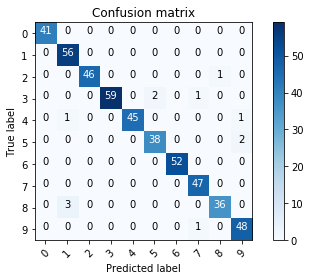

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=1.5, gamma=0.2)

Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()